In [1]:
import pandas as pd 
import re
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 30)


In [2]:
## Cleaning data
df = pd.read_csv('data/Uncleaned_DS_jobs.csv')

## reseting index
df.set_index('index', inplace=True)
df.reset_index(drop=True, inplace=True)

## Cleaning the Company column
df['Company Name'] = df['Company Name'].str.split('\n').str[0]

## Cleaning the Salary Estimate column
df['Salary Estimate'] = df['Salary Estimate'].str.replace('[$K]', '', regex=True).str.split(' ').str[0]

## Scrapping the Job description to get more columns variables

df['min_salary'] = df['Salary Estimate'].str.split('-').str[0]

df['max_salary'] = df['Salary Estimate'].str.split('-').str[1]

df['job_state'] = df['Location'].str.split(', ').str[1]

df['diploma'] = np.where(df['Job Description'].str.contains("(?i)Bachelor"), 1, 0)

df['python'] = np.where(df['Job Description'].str.contains("(?i)python"), 1, 0)

df['R'] = np.where(df['Job Description'].str.contains(r'\bR\b', case=False, regex=True), 1, 0)

df['excel'] = np.where(df['Job Description'].str.contains("(?i)excel"), 1, 0)

df['sql'] = np.where(df['Job Description'].str.contains("(?i)sql"), 1, 0)

df['hadoop'] = np.where(df['Job Description'].str.contains("(?i)hadoop"), 1, 0)

df['spark'] = np.where(df['Job Description'].str.contains("(?i)spark"), 1, 0)

df['aws'] = np.where(df['Job Description'].str.contains("(?i)aws|amazon web service"), 1, 0)

df['azure'] = np.where(df['Job Description'].str.contains("(?i)azure"), 1, 0)
## Used the Job title to extract the level (senior)
df['seniority'] = np.where(df['Job Title'].str.contains("(?i)sr"),1,0)


In [3]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,job_state,diploma,python,R,excel,sql,hadoop,spark,aws,azure,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,NY,1,0,0,0,0,0,0,1,1,1
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1,137,171,VA,1,0,0,0,1,1,0,0,0,0
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1,137,171,MA,0,1,1,1,0,0,0,1,0,0
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,MA,1,1,0,1,1,0,0,1,0,0
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,NY,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1,105,167,NJ,0,1,0,1,1,1,0,0,0,0
668,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1,105,167,CA,0,0,0,0,0,0,0,0,0,0
669,Data Scientist,105-167,Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1,105,167,CA,0,1,1,1,1,1,0,0,0,0
670,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1,105,167,CA,1,1,1,0,1,1,1,0,0,0


In [4]:
## Analysis the Job Description for Junior / Senior level
x_df = df['Job Description'].str.contains("(?i)senior")
filtered_df = df[x_df]
print(filtered_df['Job Description'])
print(f"\n{df['Job Description'][669]}")

0      Description\n\nThe Senior Data Scientist is re...
33     Acuity is seeking a Senior Research Statistici...
37     Join Our Growing Team\nA career with A Place f...
38     Job Title: Data Scientists\n\nJob Description\...
39     At Edmunds were driven to make car buying easi...
                             ...                        
652    About Us\n\nAt GutCheck, we pioneered agile ma...
653    Sr. ML/Data Scientist - AI/NLP/Chatbot\n\nMist...
654    JOB DESCRIPTION:\n\nHexagon US Federal is look...
655    Role: Data ScientistÂ\n\nLocation: Washington,...
663    Job Description\nEducation and Experience:\nAt...
Name: Job Description, Length: 134, dtype: object

Join a thriving company that is changing the way cancer care is delivered for millions of patients around the country. Recently spun off from an internationally renowned research and treatment hospital, AccessHope understands that cancer doesn’t play by the rules, so we don’t either. We are an agile innovative brand that


#### What is the distribution of job postings by location?

*Since the folowing graph is a interactive plot using JavaScript, github may not support the execution. A sample of the graph is on the read.me file.*
- The most jobs posting are in California with 165 positions, followed by Virginia and Massachusetts.
- the least jobs posting are in Louisiana, Mississippi and Kansas.


In [5]:
state_counts = df['job_state'].value_counts().reset_index()
state_counts.columns = ['State', 'Job Count']

# Plotting map with States and counts
fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State'],
    z=state_counts['Job Count'],
    locationmode='USA-states',
    colorscale = 'Reds',
    colorbar_title="Job Count"

))

fig.update_layout(
    title_text = 'Job Posting per State',
    geo_scope='usa', # limite map scope to USA
)

fig.update_layout(margin=dict(l=30, r=30, t=30, b=30))


fig.show()
# Since this a interactive plot using JavaScript, github may not support the execution.

#### Which skills are most commonly required in job postings?

Using the provided graph, it becomes evident that Python is the most commonly requested skill in jobs, followed by SQL and R. </br>
We can also observe that Excel holds a prominent position, despite its constraint in handling large volumes of data.

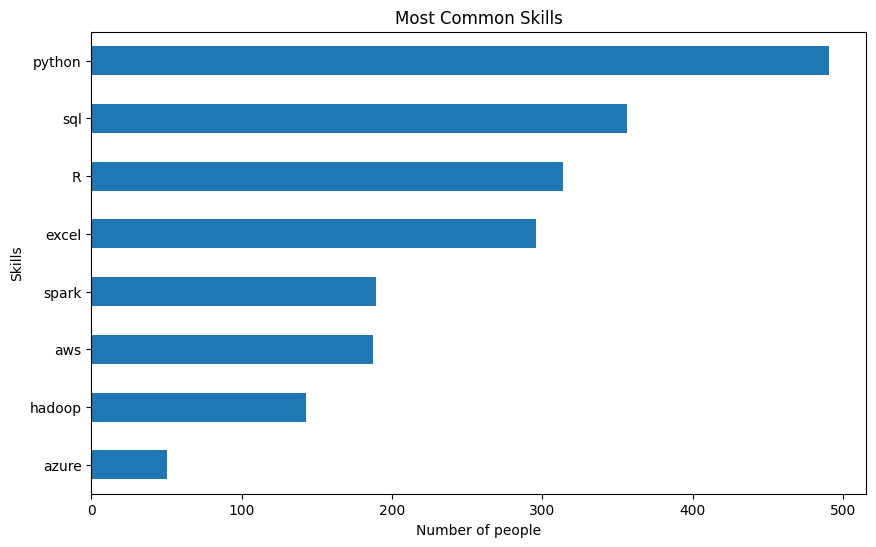

In [20]:
# Setting up columns  with skills
df_skills = df[['python','R','excel','sql','hadoop', 'spark', 'aws','azure']].sum()
# Sortin git out 
sorted_skills = df_skills.sort_values(ascending=True)
# Plotting horizontal bars.
plt.figure(figsize=(10,6))
sorted_skills.plot(kind='barh')
plt.xlabel('Number of people')
plt.ylabel('Skills')
plt.title('Most Common Skills')
plt.show()